# Histogram Equalisation Notebook

In [1]:
#export
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#export
from dataclasses import dataclass

In [3]:
import pdb

In [4]:
#export
from Export.nb_PixelManipulation import *

In [5]:
frog_img = cv2.imread('Images/dat_boi.jpg')
stub_image = np.arange(12).reshape(2,2,3)

## Adding a channel range class and constrast enhancement

Create a data class to represent the range of a channel.

In [6]:
#export

@dataclass
class ChannelRange: 
    c_range: np.array = np.array([], dtype = np.uint8)
    
    def __len__(self):
        return len(self.c_range) // 2
    
    def __getitem__(self, idx):
        return self.c_range[idx*2:idx*2 + 2]
    
    def checkLength(self):
        if self.c_range % 2 != 0: print('Length is not even!')

In [7]:
channel_range = ChannelRange(np.array([125, 175, 125, 175, 150, 200], dtype = np.uint8))

In [8]:
channel_range

ChannelRange(c_range=array([125, 175, 125, 175, 150, 200], dtype=uint8))

In [9]:
#export

def getScalars(c_range : ChannelRange, channels : int):
    scalars = np.ndarray(channels, dtype = np.uint8)
    for k in range(channels): scalars[k] = 255 // (c_range[k][1] - c_range[k][0])
    return scalars

def putPixelInRange(px : int, channel_range: np.array, scalar : int):
    lower, upper = channel_range
    if px < lower: return np.uint8(0)
    if px > upper: return np.uint8(255)
    return np.uint8((px - lower)*scalar)

def enhanceContrast(img : np.array, channel_range : ChannelRange):
    img, height, width, channels, im_size = getChannels(img)
    scalars = getScalars(channel_range, channels)
    
    i = 0; j = 0; k = 0;
    for px in np.nditer(img):
        img[i, j, k] = putPixelInRange(px, channel_range[k], scalars[k])
        i, j, k = iterateImage(i, j, k, channels, width)
    return img

## Making a stub image to test result

In [10]:
stub_range = ChannelRange(np.array([0, 25, 0, 25, 0, 25], dtype = np.uint8))

In [11]:
stub_image

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [12]:
stub_res = enhanceContrast(stub_image, stub_range); print(stub_res)

[[[  0  10  20]
  [ 30  40  50]]

 [[ 60  70  80]
  [ 90 100 110]]]


In [13]:
if not(np.all(stub_res == (stub_image * 10))) : print('Constrast result not as expected.')

## Show the results on the frog image

In [14]:
frog_contrast = enhanceContrast(frog_img, channel_range)

In [15]:
#export
def compareTwoImages(im_x, im_y):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1);
    showImage(im_x)
    plt.subplot(1,2,2);
    showImage(im_y)

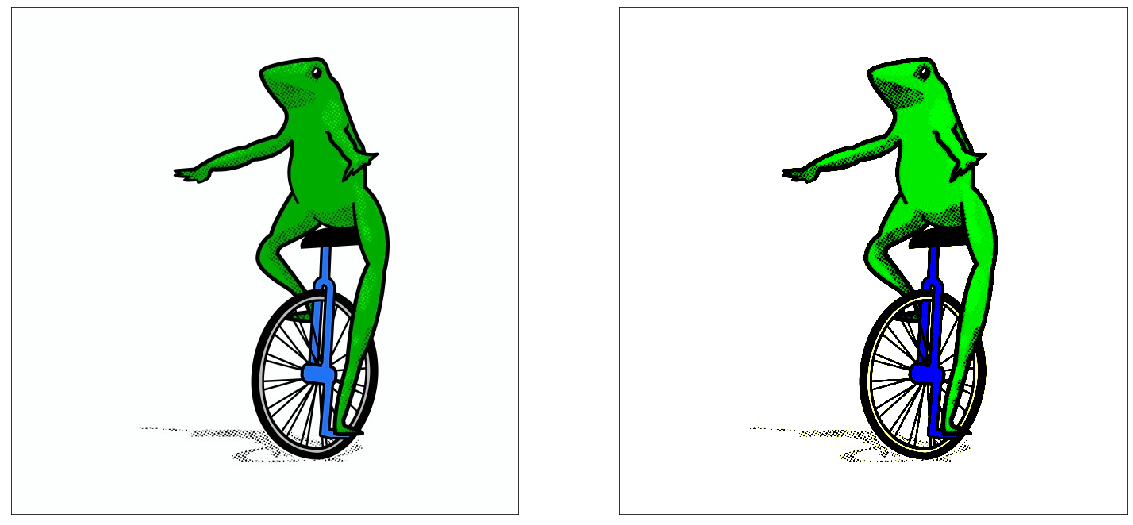

In [16]:
compareTwoImages(frog_img, frog_contrast)

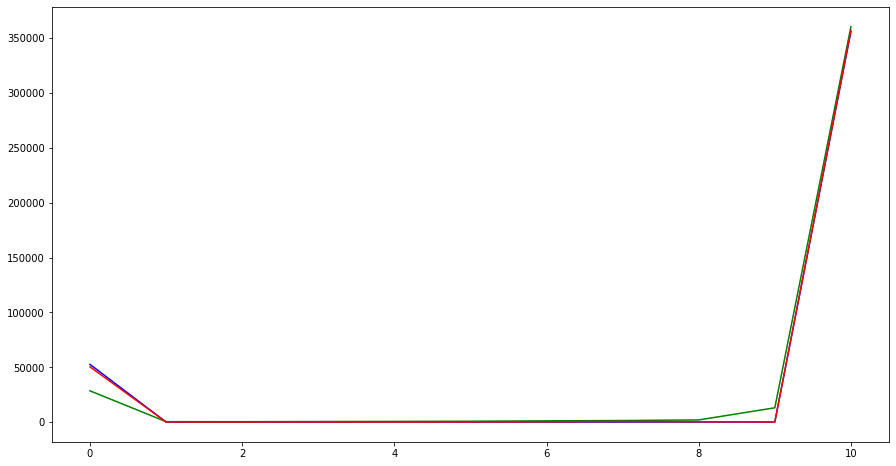

In [17]:
frog_histograms = computeHistogram(frog_contrast, 10)
plotHistogram(frog_histograms)

## Export

In [18]:
!python notebook2script.py HistogramEqualisation.ipynb

Converted HistogramEqualisation.ipynb to Export\nb_HistogramEqualisation.py
